In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


In [3]:
data = pd.read_csv('deadliest_aircraft_accidentss.csv')

In [4]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Airport,Distance,Date
0,"est. 1,700[b]",11,81,"est. 1,600",†,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],NaN,NaN,11-09-2001
1,"est. 1,000[c]",9,56,est. 900,†,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],NaN,NaN,11-09-2001
2,583,23,560,0,‡,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],TFN,NaN,27-03-1977
3,520,15,505,0,NaN,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],NaN,NaN,12-08-1985
4,349,33,316,0,†,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],NaN,NaN,12-11-1996


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Total        562 non-null    object
 1   Crew         561 non-null    object
 2   passenger    561 non-null    object
 3   Ground       562 non-null    object
 4   Notes        421 non-null    object
 5   T            562 non-null    object
 6   Incident[a]  562 non-null    object
 7   Aircraft     562 non-null    object
 8   Location     562 non-null    object
 9   Phase        562 non-null    object
 10  Airport      292 non-null    object
 11  Distance     244 non-null    object
 12  Date         562 non-null    object
dtypes: object(13)
memory usage: 57.2+ KB


In [6]:
data['Notes'].value_counts()

data['Notes'] = data['Notes'].map(lambda x: 'survivors' if x == '1*' else 'no survivors')

In [7]:
data['Notes'].value_counts()

Notes
no survivors    536
survivors        26
Name: count, dtype: int64

In [8]:
data['Notes'].isnull().sum()

0

In [9]:
data.isnull().sum()

Total            0
Crew             1
passenger        1
Ground           0
Notes            0
T                0
Incident[a]      0
Aircraft         0
Location         0
Phase            0
Airport        270
Distance       318
Date             0
dtype: int64

In [10]:
data['Airport'].value_counts()

Airport
IKT    4
DCA    4
***    4
TFN    3
SVO    3
      ..
LIM    1
ABV    1
BOM    1
IDL    1
OAK    1
Name: count, Length: 231, dtype: int64

In [11]:
# hence we can see the total number of entery of the data is 562 and the null values of the airport is 270

In [12]:
data.drop(columns=['Airport'], axis=1, inplace=True)

In [13]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Distance,Date
0,"est. 1,700[b]",11,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],NaN,11-09-2001
1,"est. 1,000[c]",9,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],NaN,11-09-2001
2,583,23,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],NaN,27-03-1977
3,520,15,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],NaN,12-08-1985
4,349,33,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],NaN,12-11-1996


<Axes: >

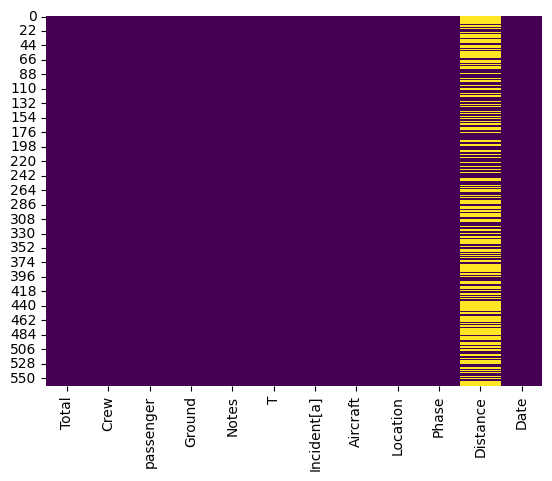

In [14]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [15]:
data['Distance'].value_counts() # we can se that distance is not a significant feature for this dataset and contain many null values

Distance
3 km (1.6 NM)         11
1.5 km (0.81 NM)       8
10 km (5.4 NM)         7
1 km (0.54 NM)         6
13 km (7.0 NM)         6
                      ..
c. 15 km (8.1 NM)      1
c. 5.5 km (3.0 NM)     1
c. 32 km (17 NM)       1
30 km (16 NM)          1
22 km (12 NM)          1
Name: count, Length: 121, dtype: int64

In [16]:
data.drop(columns=['Distance'], inplace=True,axis=1)

<Axes: >

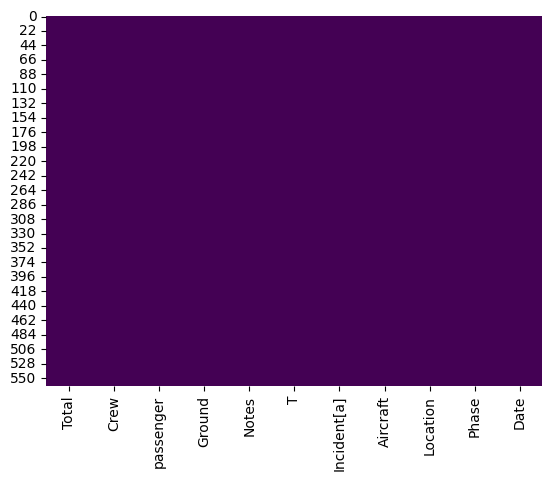

In [17]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [18]:
data.isnull().sum()

Total          0
Crew           1
passenger      1
Ground         0
Notes          0
T              0
Incident[a]    0
Aircraft       0
Location       0
Phase          0
Date           0
dtype: int64

In [19]:
# we can see Crew and passenger column has one null value so we will fill it with meam value


In [20]:
for columns in data:
    if data.dtypes[columns] == 'object':
        print(columns)

Total
Crew
passenger
Ground
Notes
T
Incident[a]
Aircraft
Location
Phase
Date


In [21]:
data['Crew']= pd.to_numeric(data['Crew'], errors='coerce')

In [22]:
data.fillna(data['Crew'].mean(),inplace=True)

In [23]:
data.isnull().sum()

Total          0
Crew           0
passenger      0
Ground         0
Notes          0
T              0
Incident[a]    0
Aircraft       0
Location       0
Phase          0
Date           0
dtype: int64

In [24]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Date
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],11-09-2001
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],11-09-2001
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],27-03-1977
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],12-08-1985
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],12-11-1996


In [25]:
data['Aircraft'].value_counts(ascending=True)

Aircraft
Boeing 767-223ER                        1
Antonov An-124-100                      1
Akron-class rigid airship               1
Boeing 707-320                          1
Sikorsky S-65C-3 Yas'ur 2000 (both)     1
                                       ..
Douglas DC-6B                           8
McDonnell Douglas DC-9-32               8
Ilyushin Il-18V                         9
Douglas DC-4                            9
Tupolev Tu-154M                        10
Name: count, Length: 359, dtype: int64

In [26]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Total        562 non-null    object        
 1   Crew         562 non-null    float64       
 2   passenger    562 non-null    object        
 3   Ground       562 non-null    object        
 4   Notes        562 non-null    object        
 5   T            562 non-null    object        
 6   Incident[a]  562 non-null    object        
 7   Aircraft     562 non-null    object        
 8   Location     562 non-null    object        
 9   Phase        562 non-null    object        
 10  Date         562 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 48.4+ KB


In [28]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Date
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001-09-11
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001-09-11
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977-03-27
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985-08-12
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996-11-12


In [29]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Date
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001-09-11
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001-09-11
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977-03-27
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985-08-12
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996-11-12


In [30]:
data['Phase'].value_counts()

Phase
ENR [5]           1
ENR [472][473]    1
ENR [465]         1
ENR [466]         1
ENR [467]         1
                 ..
ICL [238]         1
APR [237]         1
APR [236]         1
ICL [235]         1
ENR [684]         1
Name: count, Length: 562, dtype: int64

In [31]:
# data.to_csv('deadliest_aircraft_accidents_cleaned.csv', index=False)


In [32]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Date
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001-09-11
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001-09-11
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977-03-27
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985-08-12
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996-11-12


In [33]:
# Year of Incident – Extracted from the date.

data['Year']= data['Date'].dt.year

In [34]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Date,Year
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001-09-11,2001
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001-09-11,2001
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977-03-27,1977
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985-08-12,1985
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996-11-12,1996


In [35]:
# month of Incident – Extracted from the date.
data['Month']=data['Date'].dt.month

In [36]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Date,Year,Month
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001-09-11,2001,9
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001-09-11,2001,9
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977-03-27,1977,3
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985-08-12,1985,8
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996-11-12,1996,11


In [37]:
# extracting the day of the week from the date
data['days_of_week']=data['Date'].dt.day_name()

In [38]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Date,Year,Month,days_of_week
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001-09-11,2001,9,Tuesday
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001-09-11,2001,9,Tuesday
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977-03-27,1977,3,Sunday
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985-08-12,1985,8,Monday
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996-11-12,1996,11,Tuesday


In [39]:
# now droping the date column as we have extracted the year, month and day of week from it
data.drop(columns=['Date'],inplace=True,axis=1)

In [40]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Year,Month,days_of_week
0,"est. 1,700[b]",11.0,81,"est. 1,600",no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001,9,Tuesday
1,"est. 1,000[c]",9.0,56,est. 900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001,9,Tuesday
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977,3,Sunday
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985,8,Monday
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996,11,Tuesday


In [42]:
data[['Total','passenger','Crew']].value_counts()

Total          passenger  Crew
50             44         6.0     7
               45         5.0     5
63             55         8.0     4
59             55         4.0     4
108            100        8.0     4
                                 ..
178            169        5.0     1
               165        13.0    1
176            170        6.0     1
               162        14.0    1
est. 1,700[b]  81         11.0    1
Name: count, Length: 460, dtype: int64

In [ ]:
# removing the est., comma, and brackets from the Total column
data['Total'] = data['Total'].str.replace(r' est\.|,|\[.*?\]', '', regex=True)     # using str.replace with this we can remove unwanted thing from the row 

In [46]:
data['Total']

0      est. 1700
1      est. 1000
2            583
3            520
4            349
         ...    
557           50
558           50
559           50
560           50
561           50
Name: Total, Length: 562, dtype: object

In [50]:
data['Total']=data['Total'].str.replace('est.','').str.replace('+','')

In [51]:
data['Total'].astype('int')

0      1700
1      1000
2       583
3       520
4       349
       ... 
557      50
558      50
559      50
560      50
561      50
Name: Total, Length: 562, dtype: int32

In [71]:
data.head()


,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Year,Month,days_of_week
0,1700,11.0,81,1600,no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001,9,Tuesday
1,1000,9.0,56,900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001,9,Tuesday
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977,3,Sunday
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985,8,Monday
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996,11,Tuesday


In [64]:
# same from the column name ' Ground '


data['Ground'] = data['Ground'].str.replace('est.', '').str.replace('+', '').str.replace(',','').str.replace('[\D]','')

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Om Soni\AppData\Local\Temp\ipykernel_27624\1157913635.py:4: SyntaxWarning: invalid escape sequence '\D'
  data['Ground'] = data['Ground'].str.replace('est.', '').str.replace('+', '').str.replace(',','').str.replace('[\D]','')


In [ ]:
# Remove non-numeric characters from 'Ground' and convert to int
data['Ground'] = data['Ground'].str.replace(r'\D', '', regex=True)
data['Ground'] = data['Ground'].replace('', '0')  # Replace empty strings with '0'
data['Ground'] = data['Ground'].astype(int)
data['Ground']

0      1600
1       900
2         0
3         0
4         0
       ... 
557       0
558       0
559       0
560       0
561       0
Name: Ground, Length: 562, dtype: int32

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total         562 non-null    object 
 1   Crew          562 non-null    float64
 2   passenger     562 non-null    object 
 3   Ground        562 non-null    int32  
 4   Notes         562 non-null    object 
 5   T             562 non-null    object 
 6   Incident[a]   562 non-null    object 
 7   Aircraft      562 non-null    object 
 8   Location      562 non-null    object 
 9   Phase         562 non-null    object 
 10  Year          562 non-null    int32  
 11  Month         562 non-null    int32  
 12  days_of_week  562 non-null    object 
dtypes: float64(1), int32(3), object(9)
memory usage: 50.6+ KB


In [79]:
def remove_non_numeric(column):
    data[column] = data[column].str.replace(r'\D,est\.|,|\[.*?\]', '', regex=True)
    data[column] = data[column].str.replace('est.', '').str.replace('+', '')
    data[column] = data[column].str.replace(r'\D', '', regex=True)
    data[column] = data[column].replace('', '0')  # Replace empty strings with '0'
    print(data[column])

remove_non_numeric('passenger')

0       81
1       56
2      560
3      505
4      316
      ... 
557     45
558     41
559     44
560     45
561     47
Name: passenger, Length: 562, dtype: object


In [82]:
data[['Total','Crew','passenger','Ground']].astype(int)

,Total,Crew,passenger,Ground
0,1700,11,81,1600
1,1000,9,56,900
2,583,23,560,0
3,520,15,505,0
4,349,33,316,0
...,...,...,...,...
557,50,5,45,0
558,50,9,41,0
559,50,6,44,0
560,50,5,45,0


In [81]:
data.dropna(inplace=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 561
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total         561 non-null    int64  
 1   Crew          561 non-null    float64
 2   passenger     561 non-null    int64  
 3   Ground        561 non-null    int32  
 4   Notes         561 non-null    object 
 5   T             561 non-null    object 
 6   Incident[a]   561 non-null    object 
 7   Aircraft      561 non-null    object 
 8   Location      561 non-null    object 
 9   Phase         561 non-null    object 
 10  Year          561 non-null    int32  
 11  Month         561 non-null    int32  
 12  days_of_week  561 non-null    object 
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 54.8+ KB


In [87]:
data['passenger']=pd.to_numeric(data['passenger'], errors='coerce')

In [89]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Year,Month,days_of_week
0,1700,11.0,81,1600,no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001,9,Tuesday
1,1000,9.0,56,900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001,9,Tuesday
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977,3,Sunday
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985,8,Monday
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996,11,Tuesday


In [ ]:
data['surivors'] = data['Notes']         # creating a new column for survivors

In [91]:
data.head()

,Total,Crew,passenger,Ground,Notes,T,Incident[a],Aircraft,Location,Phase,Year,Month,days_of_week,surivors
0,1700,11.0,81,1600,no survivors,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001,9,Tuesday,no survivors
1,1000,9.0,56,900,no survivors,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001,9,Tuesday,no survivors
2,583,23.0,560,0,no survivors,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977,3,Sunday,no survivors
3,520,15.0,505,0,no survivors,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985,8,Monday,no survivors
4,349,33.0,316,0,no survivors,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996,11,Tuesday,no survivors


In [92]:
# droping the column Notes as we have created a new column for survivors
data.drop(columns=['Notes'],inplace=True,axis=1)

In [93]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Aircraft,Location,Phase,Year,Month,days_of_week,surivors
0,1700,11.0,81,1600,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR [5],2001,9,Tuesday,no survivors
1,1000,9.0,56,900,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR [6],2001,9,Tuesday,no survivors
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXI/TOF [7][14][15],1977,3,Sunday,no survivors
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR [16][17],1985,8,Monday,no survivors
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR [18][19],1996,11,Tuesday,no survivors


In [102]:
# Clean Phase to extract readable flight phases.

data['Phase'].value_counts(ascending=False)

Phase
ENR         248
APR         188
ICL          52
LDG          22
TOF          20
UNK           6
ENR           3
MNV           3
APRENR        2
              2
ENR           2
STD           1
UNK           1
TOFTXI        1
LDGSTD t      1
LDG           1
TOFTXI        1
TXITOF        1
ICL           1
APRTOF        1
APR           1
ENR f         1
TOF           1
ENRLDG        1
Name: count, dtype: int64

In [100]:
data['Phase'] = data['Phase'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove non-letter characters

In [107]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Aircraft,Location,Phase,Year,Month,days_of_week,surivors
0,1700,11.0,81,1600,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR,2001,9,Tuesday,no survivors
1,1000,9.0,56,900,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR,2001,9,Tuesday,no survivors
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXITOF,1977,3,Sunday,no survivors
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR,1985,8,Monday,no survivors
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR,1996,11,Tuesday,no survivors


In [105]:
data['Location'].value_counts(ascending=False)

Location
Douala, Cameroon                          3
Irkutsk, Russia                           3
Madrid, Spain                             3
Moscow, Russian SFSR, USSR                3
Almaty, Kazakh SSR, USSR                  3
                                         ..
Tamanrasset, Algeria                      1
Makassar Strait, Indonesia                1
near Zahedan, Iran                        1
Strait of Hormuz, off Shib Deraz, Iran    1
Shannondale, West Virginia, U.S.          1
Name: count, Length: 527, dtype: int64

In [106]:
# extacting the country from the location column
data['Location']= data['Location']

In [117]:
#pip install geocoding

In [ ]:
# extacting the Country from the Location column

data['Country']=data['Location'].apply(lambda X:X.split(',')[-1].strip())

In [ ]:
#extracting the city from the location column


data['City']= data['Location'].apply(lambda X:X.split(',')[0].strip())      

In [116]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Aircraft,Location,Phase,Year,Month,days_of_week,surivors,Country,City
0,1700,11.0,81,1600,INH,American Airlines Flight 11,Boeing 767-223ER,"New York City, New York, U.S.",ENR,2001,9,Tuesday,no survivors,U.S.,New York City
1,1000,9.0,56,900,INH,United Airlines Flight 175,Boeing 767-222,"New York City, New York, U.S.",ENR,2001,9,Tuesday,no survivors,U.S.,New York City
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,"Tenerife, Spain",TXITOF,1977,3,Sunday,no survivors,Spain,Tenerife
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,Boeing 747SR-46,"Mount Takamagahara, Ueno, Japan",ENR,1985,8,Monday,no survivors,Japan,Mount Takamagahara
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,"Charkhi Dadri, India",ENR,1996,11,Tuesday,no survivors,India,Charkhi Dadri


In [119]:
#  now we can drop the Location column as we have extracted the country and city from it
data.drop(columns=['Location'], inplace=True, axis=1)

In [124]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Aircraft,Phase,Year,Month,days_of_week,surivors,Country,City
0,1700,11.0,81,1600,INH,American Airlines Flight 11,Boeing 767-223ER,ENR,2001,9,Tuesday,no survivors,U.S.,New York City
1,1000,9.0,56,900,INH,United Airlines Flight 175,Boeing 767-222,ENR,2001,9,Tuesday,no survivors,U.S.,New York City
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,TXITOF,1977,3,Sunday,no survivors,Spain,Tenerife
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,Boeing 747SR-46,ENR,1985,8,Monday,no survivors,Japan,Mount Takamagahara
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,ENR,1996,11,Tuesday,no survivors,India,Charkhi Dadri


In [121]:
data['Aircraft'].value_counts(ascending=False)

Aircraft
Tupolev Tu-154M              10
Ilyushin Il-18V               9
Douglas DC-4                  9
Lockheed C-130H Hercules      8
McDonnell Douglas DC-9-32     8
                             ..
Douglas DC-7                  1
Canadair CL-44D4-1            1
Boeing 727-100                1
Ilyushin Il-18E               1
Boeing 377-10-26              1
Name: count, Length: 359, dtype: int64

In [123]:
# extarcting the airplane model and name from the Aircraft column
data['Aircraft'] = data['Aircraft'].str.replace(r'\(.*?\)', '', regex=True)  # Remove text in parentheses




In [125]:
data.to_csv('deadliest_aircraft_accidents_cleaned.csv', index=False)

In [4]:
# taking the aircraft name and model from the Aircraft column

data = pd.read_csv('deadliest_aircraft_accidents_cleaned.csv')

In [6]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Aircraft,Phase,Year,Month,days_of_week,surivors,Country,City,accident,Reason
0,1700,11.0,81,1600,INH,American Airlines Flight 11,Boeing 767-223ER,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack
1,1000,9.0,56,900,INH,United Airlines Flight 175,Boeing 767-222,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,TXITOF,1977,3,Sunday,no survivors,Spain,Tenerife,Collied,System failure
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,Boeing 747SR-46,ENR,1985,8,Monday,no survivors,Japan,Mount Takamagahara,Exploded,structure failure
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,ENR,1996,11,Tuesday,no survivors,India,Charkhi Dadri,Collied,System failure


In [ ]:
# taking the aircraft name from the Aircraft column
data['Aircraft_name']=data['Aircraft'].apply(lambda X:X.split(' ')[0])

In [8]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Aircraft,Phase,Year,Month,days_of_week,surivors,Country,City,accident,Reason,Aircraft_name
0,1700,11.0,81,1600,INH,American Airlines Flight 11,Boeing 767-223ER,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing
1,1000,9.0,56,900,INH,United Airlines Flight 175,Boeing 767-222,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,TXITOF,1977,3,Sunday,no survivors,Spain,Tenerife,Collied,System failure,Boeing
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,Boeing 747SR-46,ENR,1985,8,Monday,no survivors,Japan,Mount Takamagahara,Exploded,structure failure,Boeing
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,ENR,1996,11,Tuesday,no survivors,India,Charkhi Dadri,Collied,System failure,Boeing


In [11]:
# extracing model number  from the Aircraft column
data['Aircraft_model'] = data['Aircraft'].apply(lambda X:X.split(' ')[1 if len(X.split(' ')) > 1 else ''])

In [12]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Aircraft,Phase,Year,Month,days_of_week,surivors,Country,City,accident,Reason,Aircraft_name,Aircraft_model
0,1700,11.0,81,1600,INH,American Airlines Flight 11,Boeing 767-223ER,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing,767-223ER
1,1000,9.0,56,900,INH,United Airlines Flight 175,Boeing 767-222,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing,767-222
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,TXITOF,1977,3,Sunday,no survivors,Spain,Tenerife,Collied,System failure,Boeing,747-121
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,Boeing 747SR-46,ENR,1985,8,Monday,no survivors,Japan,Mount Takamagahara,Exploded,structure failure,Boeing,747SR-46
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,Boeing 747-168B and Ilyushin Il-76TD,ENR,1996,11,Tuesday,no survivors,India,Charkhi Dadri,Collied,System failure,Boeing,747-168B


In [13]:
# dropping the Aircraft column as we have extracted the aircraft name and model from it
data.drop(columns=['Aircraft'],axis=1,inplace=True)

In [14]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Phase,Year,Month,days_of_week,surivors,Country,City,accident,Reason,Aircraft_name,Aircraft_model
0,1700,11.0,81,1600,INH,American Airlines Flight 11,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing,767-223ER
1,1000,9.0,56,900,INH,United Airlines Flight 175,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing,767-222
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,TXITOF,1977,3,Sunday,no survivors,Spain,Tenerife,Collied,System failure,Boeing,747-121
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,ENR,1985,8,Monday,no survivors,Japan,Mount Takamagahara,Exploded,structure failure,Boeing,747SR-46
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,ENR,1996,11,Tuesday,no survivors,India,Charkhi Dadri,Collied,System failure,Boeing,747-168B


In [47]:
# extracting flight company name from incident column
data['flight_company'] = data['Incident[a]'].apply(lambda x: ' '.join(x.split(' ')[:3]))


In [49]:
data['flight_company']=data['flight_company'].str.replace('1234567890','')

In [50]:
data.head()

,Total,Crew,passenger,Ground,T,Incident[a],Phase,Year,Month,days_of_week,surivors,Country,City,accident,Reason,Aircraft_name,Aircraft_model,flight_company
0,1700,11.0,81,1600,INH,American Airlines Flight 11,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing,767-223ER,American Airlines Flight
1,1000,9.0,56,900,INH,United Airlines Flight 175,ENR,2001,9,Tuesday,no survivors,U.S.,New York City,Hijacked,terrorist attack,Boeing,767-222,United Airlines Flight
2,583,23.0,560,0,COM,Pan Am Flight 1736 and KLM Flight 4805,TXITOF,1977,3,Sunday,no survivors,Spain,Tenerife,Collied,System failure,Boeing,747-121,Pan Am Flight
3,520,15.0,505,0,COM,Japan Air Lines Flight 123,ENR,1985,8,Monday,no survivors,Japan,Mount Takamagahara,Exploded,structure failure,Boeing,747SR-46,Japan Air Lines
4,349,33.0,316,0,COM,Saudia Flight 763 and Kazakhstan Airlines Flig...,ENR,1996,11,Tuesday,no survivors,India,Charkhi Dadri,Collied,System failure,Boeing,747-168B,Saudia Flight 763


In [27]:
print(data.columns.tolist())  # Check for exact column names
data['Reason'].value_counts()

['Total', 'Crew', 'passenger', 'Ground', 'T', 'Incident[a]', 'Phase', 'Year', 'Month', 'days_of_week', 'surivors', 'Country', 'City', 'accident ', 'Reason', 'Aircraft_name', 'Aircraft_model', 'flight_company']


Reason
mountain collied     103
terrorist attack      44
Wing failure          38
unable to control     36
overloaded flight     32
lost signal           32
higy alltitude        30
while takeoff         30
Into sea              30
international act     30
explosive device      30
Misscommunication     30
While landing         30
System failure        24
missile attack         6
caught fire            6
aircraft               6
structure failure      6
engine problem         6
Bomb planted           6
after takeoff          6
Name: count, dtype: int64

In [52]:
data.to_csv('deadliest_aircraft_accidents_cleaned.csv', index=False)